## 关于学生叙述能力的差异分析(描述性统计)

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, tukey_hsd, levene, shapiro
import warnings
warnings.filterwarnings('ignore')

In [15]:
# 设置中文字体和图表样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
#sns.set_style("whitegrid")
#plt.style.use('seaborn-v0_8')

In [4]:
def load_and_prepare_data():
    """加载和准备数据"""
    # 读取数据
    data = pd.read_csv('../pre_data/描述性统计-grade.csv')
    
    # 将年级标签转换为更易理解的名称
    grade_mapping = {1: '高一', 2: '高二', 3: '高三'}
    data['年级名称'] = data['年级'].map(grade_mapping)
    
    # 按年级分组数据
    grade_groups = {grade: group for grade, group in data.groupby('年级名称')}
    
    return data, grade_groups

In [5]:
def descriptive_statistics(data, grade_groups):
    """描述性统计分析"""
    print("=" * 60)
    print("描述性统计分析报告")
    print("=" * 60)
    
    # 1. 基本统计信息
    print("\n1. 数据基本信息：")
    print(f"总样本数：{len(data)}")
    print(f"年级分布：\n{data['年级名称'].value_counts().sort_index()}")
    
    # 2. 各年级描述性统计
    print("\n2. 各年级描述性统计：")
    
    for grade_name in ['高一', '高二', '高三']:
        group_data = grade_groups[grade_name]
        print(f"\n{grade_name}：")
        print(f"  样本数：{len(group_data)}")
        print(f"  单词数量 - 均值：{group_data['单词数量-DESWC-03'].mean():.2f}, 标准差：{group_data['单词数量-DESWC-03'].std():.2f}")
        print(f"  句子数量 - 均值：{group_data['句子数量-DESSC-02'].mean():.2f}, 标准差：{group_data['句子数量-DESSC-02'].std():.2f}")

In [6]:
def normality_test(data, grade_groups):
    """正态性检验"""
    print("\n3. 正态性检验：")
    
    for grade_name in ['高一', '高二', '高三']:
        group_data = grade_groups[grade_name]
        
        # 单词数量正态性检验
        stat_word, p_word = shapiro(group_data['单词数量-DESWC-03'])
        # 句子数量正态性检验
        stat_sent, p_sent = shapiro(group_data['句子数量-DESSC-02'])
        
        print(f"\n{grade_name}：")
        print(f"  单词数量 - Shapiro-Wilk检验：W={stat_word:.4f}, p={p_word:.4f} {'(正态分布)' if p_word > 0.05 else '(非正态分布)'}")
        print(f"  句子数量 - Shapiro-Wilk检验：W={stat_sent:.4f}, p={p_sent:.4f} {'(正态分布)' if p_sent > 0.05 else '(非正态分布)'}")

In [7]:
def variance_homogeneity_test(data, grade_groups):
    """方差齐性检验"""
    print("\n4. 方差齐性检验：")
    
    # 提取各年级数据
    grade1_words = grade_groups['高一']['单词数量-DESWC-03']
    grade2_words = grade_groups['高二']['单词数量-DESWC-03']
    grade3_words = grade_groups['高三']['单词数量-DESWC-03']
    
    grade1_sents = grade_groups['高一']['句子数量-DESSC-02']
    grade2_sents = grade_groups['高二']['句子数量-DESSC-02']
    grade3_sents = grade_groups['高三']['句子数量-DESSC-02']
    
    # Levene检验
    stat_word, p_word = levene(grade1_words, grade2_words, grade3_words)
    stat_sent, p_sent = levene(grade1_sents, grade2_sents, grade3_sents)
    
    print(f"单词数量 - Levene检验：F={stat_word:.4f}, p={p_word:.4f} {'(方差齐性)' if p_word > 0.05 else '(方差非齐性)'}")
    print(f"句子数量 - Levene检验：F={stat_sent:.4f}, p={p_sent:.4f} {'(方差齐性)' if p_sent > 0.05 else '(方差非齐性)'}")

In [8]:

def grade_comparison_analysis(data, grade_groups):
    """年级间比较分析"""
    print("\n5. 年级间比较分析：")
    
    # 提取各年级数据
    grade1_words = grade_groups['高一']['单词数量-DESWC-03']
    grade2_words = grade_groups['高二']['单词数量-DESWC-03']
    grade3_words = grade_groups['高三']['单词数量-DESWC-03']
    
    grade1_sents = grade_groups['高一']['句子数量-DESSC-02']
    grade2_sents = grade_groups['高二']['句子数量-DESSC-02']
    grade3_sents = grade_groups['高三']['句子数量-DESSC-02']
    
    # 单词数量分析
    print("\n单词数量年级间比较：")
    f_stat_word, p_word = f_oneway(grade1_words, grade2_words, grade3_words)
    print(f"  单因素方差分析：F={f_stat_word:.4f}, p={p_word:.4f}")
    
    if p_word < 0.05:
        print("  结果：存在显著性差异")
        # Tukey HSD事后检验
        tukey_result = tukey_hsd(grade1_words, grade2_words, grade3_words)
        print("  Tukey HSD事后检验结果：")
        print(tukey_result.pvalue[0][1])
        # 修复：提取数组中的具体数值
        print(f"    高一 vs 高二：p={tukey_result.pvalue[0][1]:.4f}")
        print(f"    高一 vs 高三：p={tukey_result.pvalue[0][2]:.4f}")
        print(f"    高二 vs 高三：p={tukey_result.pvalue[1][2]:.4f}")
    else:
        print("  结果：无显著性差异")
    
    # 句子数量分析
    print("\n句子数量年级间比较：")
    f_stat_sent, p_sent = f_oneway(grade1_sents, grade2_sents, grade3_sents)
    print(f"  单因素方差分析：F={f_stat_sent:.4f}, p={p_sent:.4f}")
    
    if p_sent < 0.05:
        print("  结果：存在显著性差异")
        # Tukey HSD事后检验
        tukey_result = tukey_hsd(grade1_sents, grade2_sents, grade3_sents)
        print("  Tukey HSD事后检验结果：")
        # 修复：提取数组中的具体数值
        print(f"    高一 vs 高二：p={tukey_result.pvalue[0][1]}")
        print(f"    高一 vs 高三：p={tukey_result.pvalue[0][2]}")
        print(f"    高二 vs 高三：p={tukey_result.pvalue[1][2]}")
    else:
        print("  结果：无显著性差异")

In [9]:
def within_grade_analysis(data, grade_groups):
    """年级内比较分析"""
    print("\n6. 年级内比较分析：")
    
    for grade_name in ['高一', '高二', '高三']:
        group_data = grade_groups[grade_name]
        
        print(f"\n{grade_name}内部差异分析：")
        
        # 单词数量内部差异
        word_cv = group_data['单词数量-DESWC-03'].std() / group_data['单词数量-DESWC-03'].mean() * 100
        word_range = group_data['单词数量-DESWC-03'].max() - group_data['单词数量-DESWC-03'].min()
        word_iqr = group_data['单词数量-DESWC-03'].quantile(0.75) - group_data['单词数量-DESWC-03'].quantile(0.25)
        
        print(f"  单词数量：")
        print(f"    变异系数：{word_cv:.2f}%")
        print(f"    极差：{word_range}")
        print(f"    四分位距：{word_iqr:.2f}")
        
        # 句子数量内部差异
        sent_cv = group_data['句子数量-DESSC-02'].std() / group_data['句子数量-DESSC-02'].mean() * 100
        sent_range = group_data['句子数量-DESSC-02'].max() - group_data['句子数量-DESSC-02'].min()
        sent_iqr = group_data['句子数量-DESSC-02'].quantile(0.75) - group_data['句子数量-DESSC-02'].quantile(0.25)
        
        print(f"  句子数量：")
        print(f"    变异系数：{sent_cv:.2f}%")
        print(f"    极差：{sent_range}")
        print(f"    四分位距：{sent_iqr:.2f}")

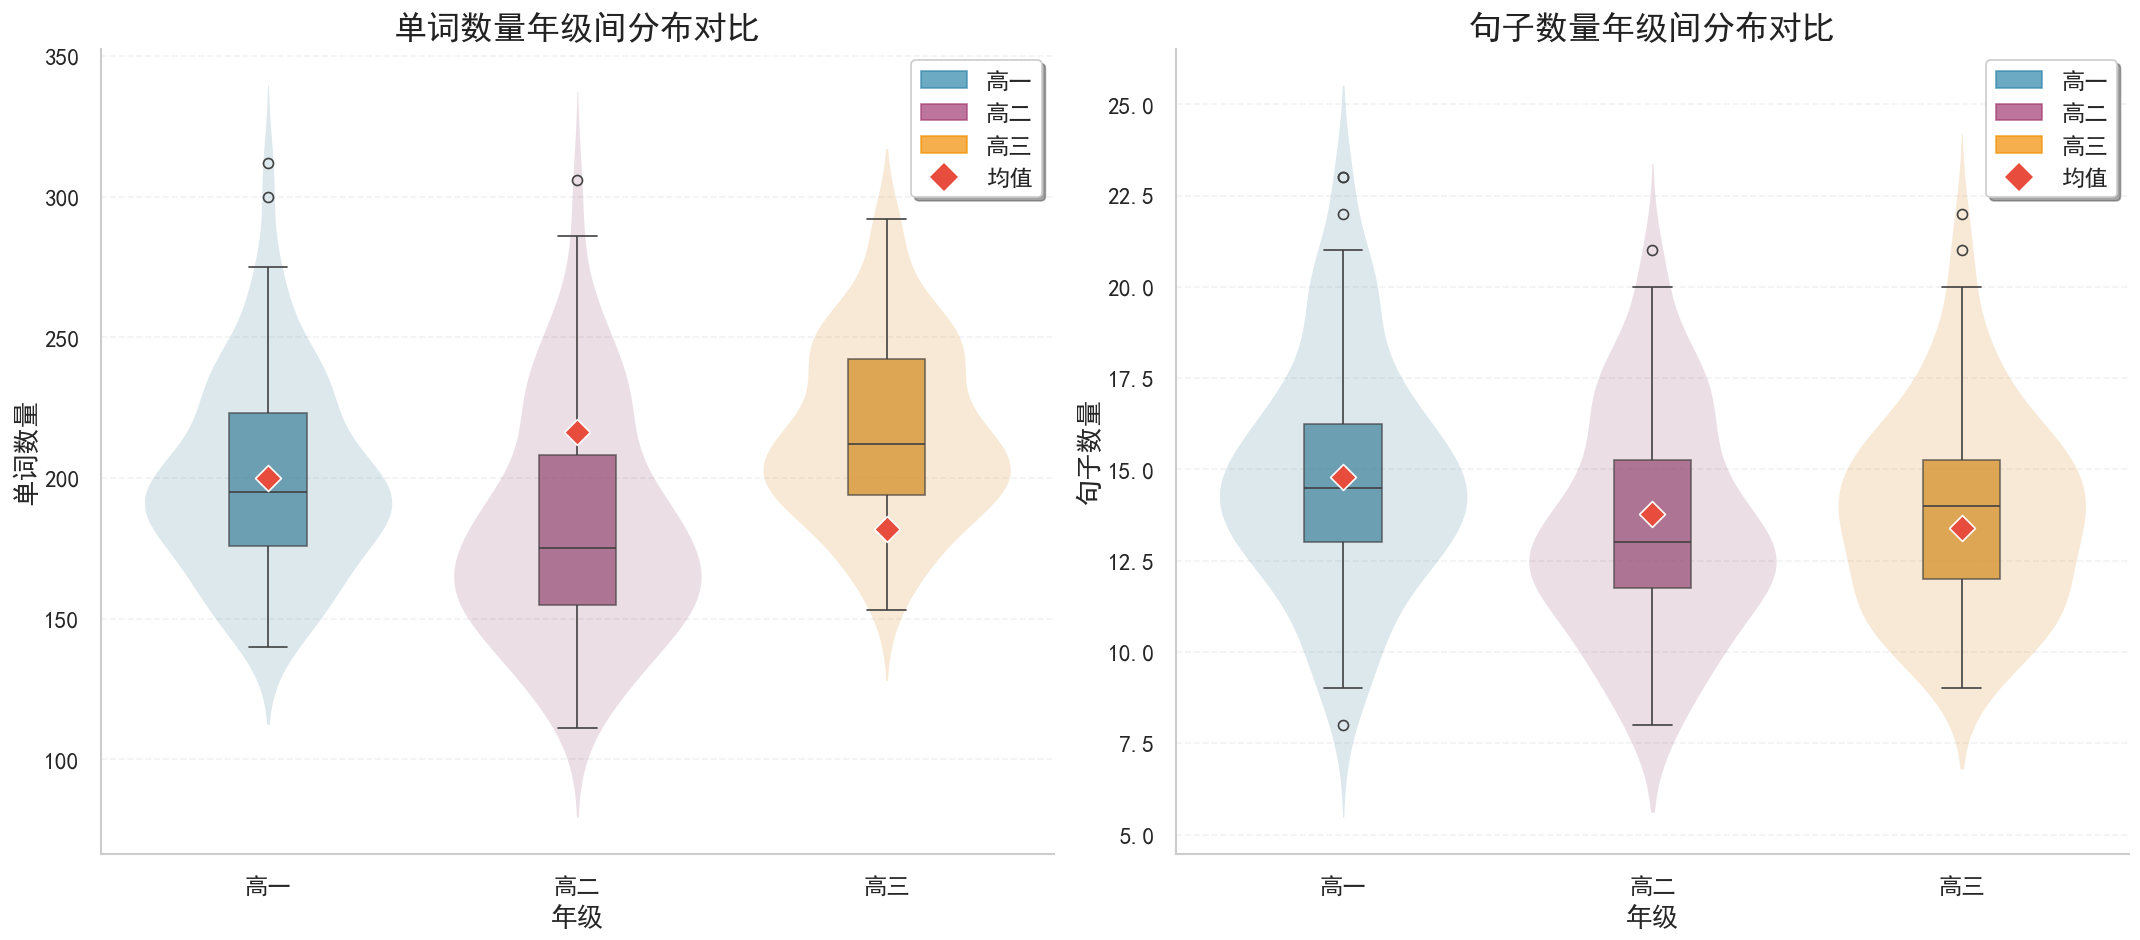

箱线图已保存为: ../res/boxplot_comparison.png


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def create_boxplot_comparison(data, grade_groups, save_path='../res/boxplot_comparison.png'):
    """
    创建更美观高级的箱线图比较，采用seaborn风格，增加分布、均值、样式美化等
    """
    # 设置全局风格
    sns.set_theme(style="whitegrid", font="SimHei", rc={
        "axes.titlesize": 20,
        "axes.labelsize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14,
        "axes.titleweight": "bold"
    })
    plt.rcParams['axes.unicode_minus'] = False

    grade_names = ['高一', '高二', '高三']
    colors = ['#2E86AB', '#A23B72', '#F18F01']

    # 准备数据
    word_data = [grade_groups[grade]['单词数量-DESWC-03'] for grade in grade_names]
    sent_data = [grade_groups[grade]['句子数量-DESSC-02'] for grade in grade_names]

    # 构造DataFrame用于seaborn
    import pandas as pd
    df_word = pd.DataFrame({
        '年级': np.repeat(grade_names, [len(x) for x in word_data]),
        '单词数量': np.concatenate(word_data)
    })
    df_sent = pd.DataFrame({
        '年级': np.repeat(grade_names, [len(x) for x in sent_data]),
        '句子数量': np.concatenate(sent_data)
    })

    fig, axes = plt.subplots(1, 2, figsize=(18, 8), dpi=120, constrained_layout=True)

    # 单词数量箱线图+小提琴图
    sns.violinplot(
        x='年级', y='单词数量', data=df_word, ax=axes[0],
        inner=None, palette=colors, linewidth=0, alpha=0.18
    )
    sns.boxplot(
        x='年级', y='单词数量', data=df_word, ax=axes[0],
        width=0.25, palette=colors, boxprops=dict(alpha=0.7)
    )
    # 均值点
    means = df_word.groupby('年级')['单词数量'].mean()
    axes[0].scatter(range(len(grade_names)), means, color='#E74C3C', s=120, marker='D', edgecolor='white', zorder=10, label='均值')
    # 美化
    axes[0].set_title('单词数量年级间分布对比', fontsize=20, fontweight='bold', color='#222')
    axes[0].set_xlabel('年级', fontsize=16, fontweight='bold')
    axes[0].set_ylabel('单词数量', fontsize=16, fontweight='bold')
    axes[0].grid(axis='y', linestyle='--', alpha=0.25)
    axes[0].set_axisbelow(True)
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)

    # 句子数量箱线图+小提琴图
    sns.violinplot(
        x='年级', y='句子数量', data=df_sent, ax=axes[1],
        inner=None, palette=colors, linewidth=0, alpha=0.18
    )
    sns.boxplot(
        x='年级', y='句子数量', data=df_sent, ax=axes[1],
        width=0.25, palette=colors, boxprops=dict(alpha=0.7)
    )
    # 均值点
    means = df_sent.groupby('年级')['句子数量'].mean()
    axes[1].scatter(range(len(grade_names)), means, color='#E74C3C', s=120, marker='D', edgecolor='white', zorder=10, label='均值')
    # 美化
    axes[1].set_title('句子数量年级间分布对比', fontsize=20, fontweight='bold', color='#222')
    axes[1].set_xlabel('年级', fontsize=16, fontweight='bold')
    axes[1].set_ylabel('句子数量', fontsize=16, fontweight='bold')
    axes[1].grid(axis='y', linestyle='--', alpha=0.25)
    axes[1].set_axisbelow(True)
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)

    # 自定义图例
    legend_elements = [
        Patch(facecolor='#2E86AB', edgecolor='#2E86AB', label='高一', alpha=0.7),
        Patch(facecolor='#A23B72', edgecolor='#A23B72', label='高二', alpha=0.7),
        Patch(facecolor='#F18F01', edgecolor='#F18F01', label='高三', alpha=0.7),
        Line2D([0], [0], marker='D', color='w', label='均值', markerfacecolor='#E74C3C', markeredgecolor='white', markersize=12)
    ]
    axes[0].legend(handles=legend_elements, loc='upper right', frameon=True, fancybox=True, shadow=True)
    axes[1].legend(handles=legend_elements, loc='upper right', frameon=True, fancybox=True, shadow=True)

    # 去除多余边距
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    print(f"箱线图已保存为: {save_path}")
    
create_boxplot_comparison(data, grade_groups,save_path='../res/boxplot_comparison.png')

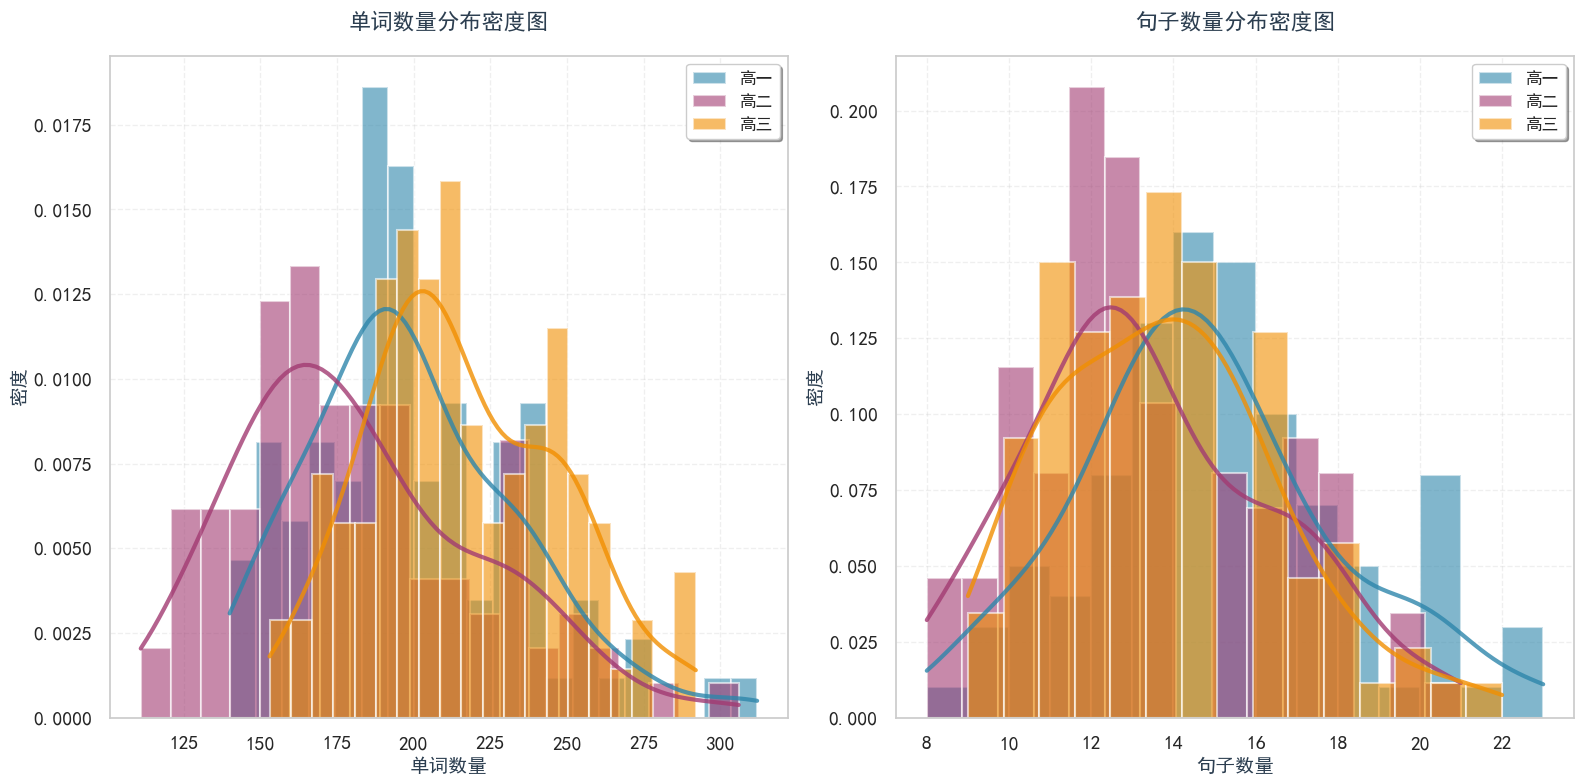

密度分布图已保存为: ../res/density_distribution.png


In [19]:
def create_density_distribution(data, grade_groups, save_path='../res/density_distribution.png'):
    """创建专业美观的密度分布图"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    grade_names = ['高一', '高二', '高三']
    
    # 单词数量密度图
    for i, grade in enumerate(grade_names):
        grade_data = grade_groups[grade]['单词数量-DESWC-03']
        ax1.hist(grade_data, bins=20, alpha=0.6, density=True, 
                color=colors[i], edgecolor='white', linewidth=1.5, label=grade)
        
        # 添加核密度估计曲线
        from scipy.stats import gaussian_kde
        kde = gaussian_kde(grade_data)
        x_range = np.linspace(grade_data.min(), grade_data.max(), 100)
        ax1.plot(x_range, kde(x_range), color=colors[i], linewidth=3, alpha=0.8)
    
    ax1.set_title('单词数量分布密度图', fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
    ax1.set_xlabel('单词数量', fontsize=14, fontweight='bold', color='#2C3E50')
    ax1.set_ylabel('密度', fontsize=14, fontweight='bold', color='#2C3E50')
    ax1.legend(fontsize=12, frameon=True, fancybox=True, shadow=True)
    ax1.grid(True, alpha=0.3, linestyle='--')
    
    # 句子数量密度图
    for i, grade in enumerate(grade_names):
        grade_data = grade_groups[grade]['句子数量-DESSC-02']
        ax2.hist(grade_data, bins=15, alpha=0.6, density=True,
                color=colors[i], edgecolor='white', linewidth=1.5, label=grade)
        
        # 添加核密度估计曲线
        kde = gaussian_kde(grade_data)
        x_range = np.linspace(grade_data.min(), grade_data.max(), 100)
        ax2.plot(x_range, kde(x_range), color=colors[i], linewidth=3, alpha=0.8)
    
    ax2.set_title('句子数量分布密度图', fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
    ax2.set_xlabel('句子数量', fontsize=14, fontweight='bold', color='#2C3E50')
    ax2.set_ylabel('密度', fontsize=14, fontweight='bold', color='#2C3E50')
    ax2.legend(fontsize=12, frameon=True, fancybox=True, shadow=True)
    ax2.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    print(f"密度分布图已保存为: {save_path}")

create_density_distribution(data, grade_groups)

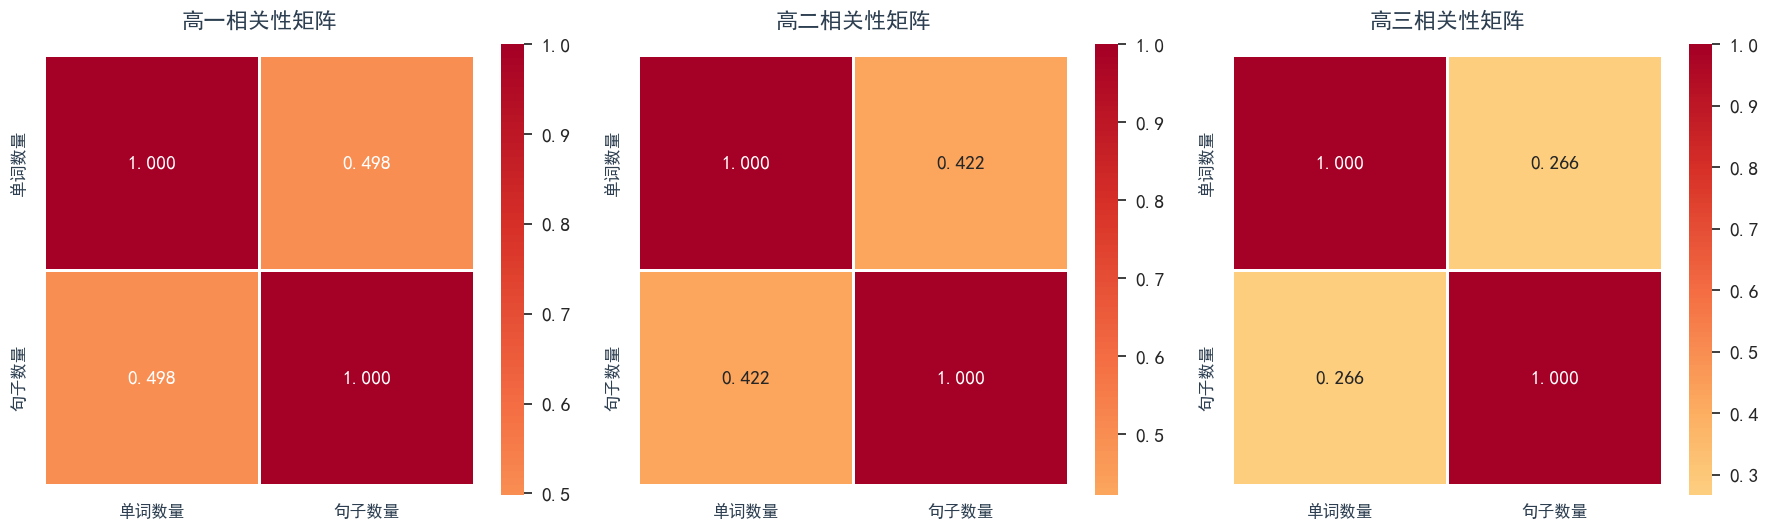

相关性热力图已保存为: ../res/correlation_heatmap.png


In [23]:
def create_heatmap_correlation(data, grade_groups, save_path='../res/correlation_heatmap.png'):
    """创建专业美观的相关性热力图"""
    # 计算各年级的相关性矩阵
    correlations = {}
    for grade in ['高一', '高二', '高三']:
        grade_data = grade_groups[grade]
        #对属性列进行重命名
        grade_data.rename(columns={'单词数量-DESWC-03': '单词数量', '句子数量-DESSC-02': '句子数量'}, inplace=True)
        corr_matrix = grade_data[['单词数量', '句子数量']].corr()
        correlations[grade] = corr_matrix
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i, (grade, corr_matrix) in enumerate(correlations.items()):
        sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
                   square=True, linewidths=2, cbar_kws={"shrink": .8},
                   ax=axes[i], fmt='.3f', annot_kws={'size': 14, 'weight': 'bold'})
        
        axes[i].set_title(f'{grade}相关性矩阵', fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
        axes[i].tick_params(axis='both', which='major', labelsize=12, labelcolor='#2C3E50')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    print(f"相关性热力图已保存为: {save_path}")
create_heatmap_correlation(data, grade_groups)

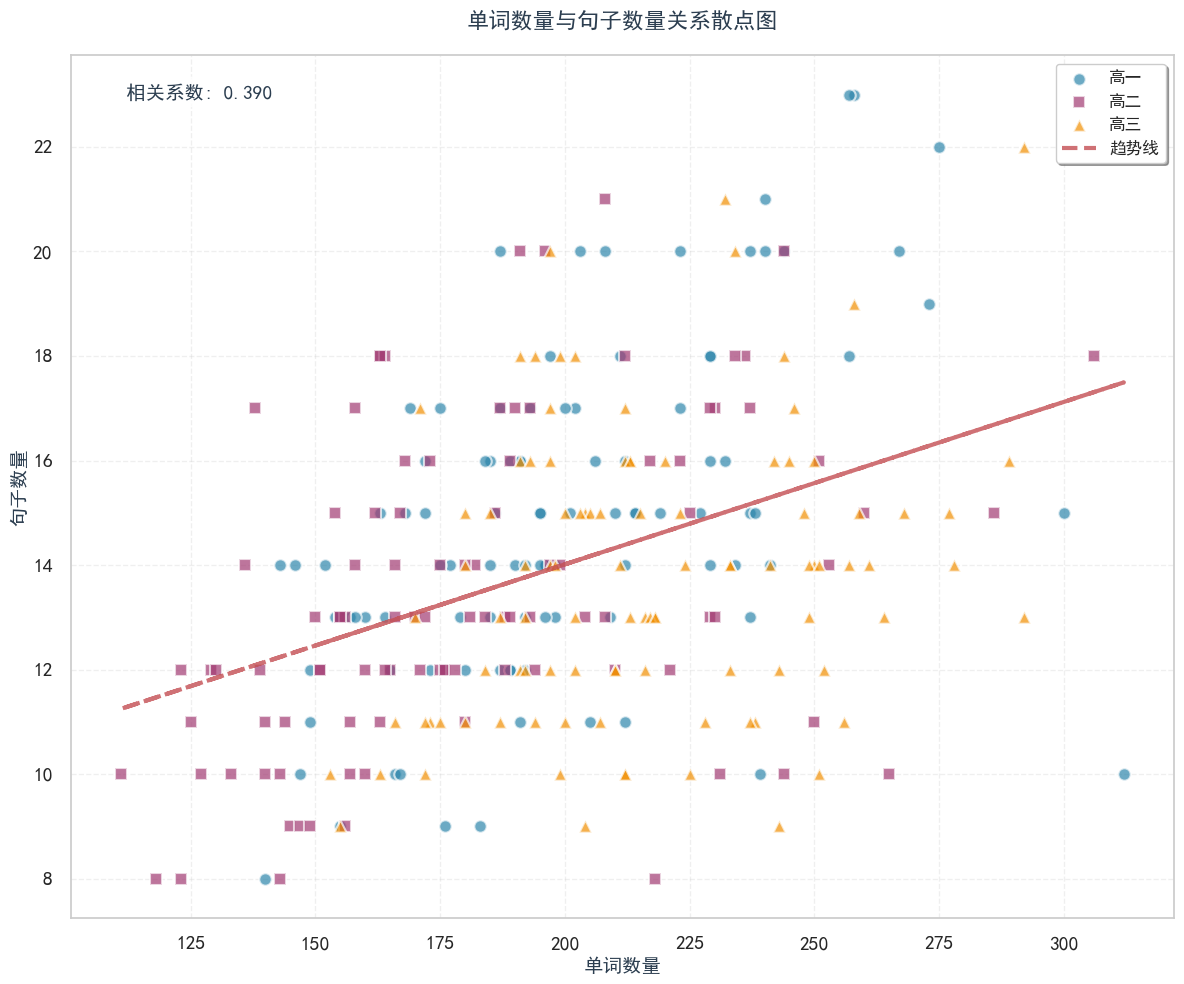

散点关系图已保存为: ../res/scatter_relationship.png


In [21]:
def create_scatter_relationship(data, grade_groups, save_path='../res/scatter_relationship.png'):
    """创建专业美观的散点关系图"""
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    markers = ['o', 's', '^']
    grade_names = ['高一', '高二', '高三']
    
    for i, grade in enumerate(grade_names):
        grade_data = grade_groups[grade]
        ax.scatter(grade_data['单词数量-DESWC-03'], 
                  grade_data['句子数量-DESSC-02'],
                  alpha=0.7, s=80, c=colors[i], marker=markers[i], 
                  edgecolors='white', linewidth=1.5, label=grade)
    
    # 添加趋势线
    all_words = data['单词数量-DESWC-03']
    all_sents = data['句子数量-DESSC-02']
    z = np.polyfit(all_words, all_sents, 1)
    p = np.poly1d(z)
    ax.plot(all_words, p(all_words), "r--", alpha=0.8, linewidth=3, label='趋势线')
    
    # 计算相关系数
    corr = np.corrcoef(all_words, all_sents)[0, 1]
    ax.text(0.05, 0.95, f'相关系数: {corr:.3f}', transform=ax.transAxes, 
            fontsize=14, fontweight='bold', color='#2C3E50',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    ax.set_title('单词数量与句子数量关系散点图', fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
    ax.set_xlabel('单词数量', fontsize=14, fontweight='bold', color='#2C3E50')
    ax.set_ylabel('句子数量', fontsize=14, fontweight='bold', color='#2C3E50')
    ax.legend(fontsize=12, frameon=True, fancybox=True, shadow=True)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    print(f"散点关系图已保存为: {save_path}")
create_scatter_relationship(data, grade_groups)

In [11]:
# 加载数据
data, grade_groups = load_and_prepare_data()

# 执行各项分析
descriptive_statistics(data, grade_groups)
normality_test(data, grade_groups)
variance_homogeneity_test(data, grade_groups)
grade_comparison_analysis(data, grade_groups)
within_grade_analysis(data, grade_groups)


描述性统计分析报告

1. 数据基本信息：
总样本数：300
年级分布：
年级名称
高一    100
高三    100
高二    100
Name: count, dtype: int64

2. 各年级描述性统计：

高一：
  样本数：100
  单词数量 - 均值：199.85, 标准差：34.64
  句子数量 - 均值：14.80, 标准差：3.17

高二：
  样本数：100
  单词数量 - 均值：181.86, 标准差：39.66
  句子数量 - 均值：13.39, 标准差：3.00

高三：
  样本数：100
  单词数量 - 均值：216.33, 标准差：31.39
  句子数量 - 均值：13.79, 标准差：2.76

3. 正态性检验：

高一：
  单词数量 - Shapiro-Wilk检验：W=0.9635, p=0.0072 (非正态分布)
  句子数量 - Shapiro-Wilk检验：W=0.9713, p=0.0277 (非正态分布)

高二：
  单词数量 - Shapiro-Wilk检验：W=0.9618, p=0.0054 (非正态分布)
  句子数量 - Shapiro-Wilk检验：W=0.9659, p=0.0108 (非正态分布)

高三：
  单词数量 - Shapiro-Wilk检验：W=0.9777, p=0.0879 (正态分布)
  句子数量 - Shapiro-Wilk检验：W=0.9648, p=0.0089 (非正态分布)

4. 方差齐性检验：
单词数量 - Levene检验：F=1.9665, p=0.1418 (方差齐性)
句子数量 - Levene检验：F=0.4580, p=0.6330 (方差齐性)

5. 年级间比较分析：

单词数量年级间比较：
  单因素方差分析：F=23.7287, p=0.0000
  结果：存在显著性差异
  Tukey HSD事后检验结果：
0.0011061425110414635
    高一 vs 高二：p=0.0011
    高一 vs 高三：p=0.0032
    高二 vs 高三：p=0.0000

句子数量年级间比较：
  单因素方差分析：F=5.9440, p=0.0029
  结果：存在显著性差异
  Tukey HSD事后